<a href="https://colab.research.google.com/github/srilaadebnath/ML_LAB_CODES/blob/main/question15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [2]:
data = pd.read_csv("Weather_Data.csv")
print("Dataset loaded successfully!")
print("Shape:", data.shape)
print("\nFirst 5 rows:")
print(data.head())
print("\nMissing values per column:")
print(data.isnull().sum())

Dataset loaded successfully!
Shape: (8784, 8)

First 5 rows:
       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog  

Missing values per column:
Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0


In [4]:
data = data.fillna(data.mean(numeric_only=True))
features = data.select_dtypes(include=['int64', 'float64'])

print("\nSelected numeric features for DBSCAN:")
print(features.columns.tolist())


Selected numeric features for DBSCAN:
['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']


In [5]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
db = DBSCAN(eps=0.7, min_samples=5)
labels = db.fit_predict(features_scaled)
data['Cluster'] = labels

In [6]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_outliers = list(labels).count(-1)

print(f"\nNumber of clusters found: {n_clusters}")
print(f"Number of outliers: {n_outliers}")


Number of clusters found: 8
Number of outliers: 225


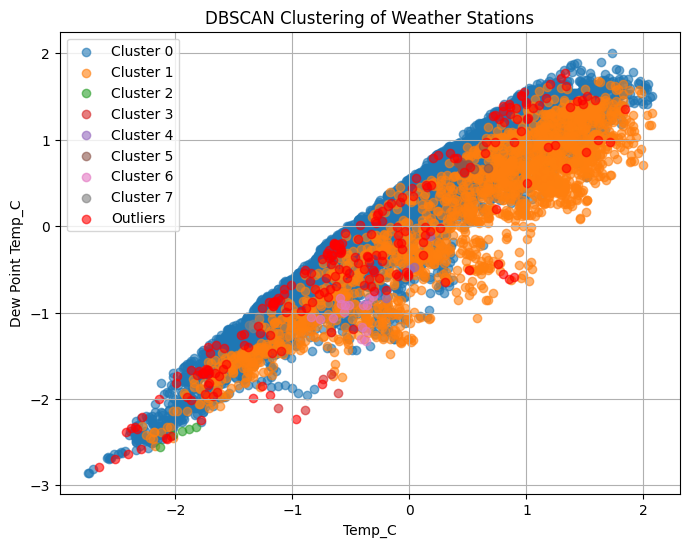

In [7]:
plt.figure(figsize=(8,6))
unique_labels = set(labels)
for label in unique_labels:
    if label == -1:
        plt.scatter(
            features_scaled[labels == label, 0],
            features_scaled[labels == label, 1],
            color='red', label='Outliers', alpha=0.6
        )
    else:
        plt.scatter(
            features_scaled[labels == label, 0],
            features_scaled[labels == label, 1],
            label=f'Cluster {label}', alpha=0.6
        )

plt.title("DBSCAN Clustering of Weather Stations")
plt.xlabel(features.columns[0])
plt.ylabel(features.columns[1])
plt.legend()
plt.grid(True)
plt.show()

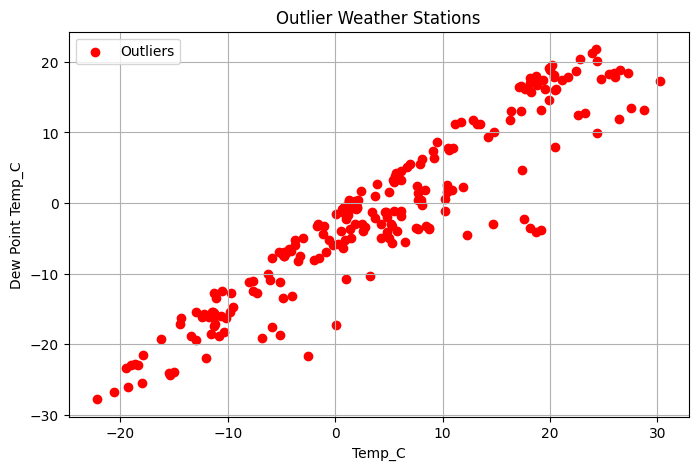


Clustered data saved as 'Weather_Clustered.csv'


In [9]:
outliers = data[data['Cluster'] == -1]
plt.figure(figsize=(8,5))
plt.scatter(outliers[features.columns[0]], outliers[features.columns[1]], color='red', label='Outliers')
plt.title("Outlier Weather Stations")
plt.xlabel(features.columns[0])
plt.ylabel(features.columns[1])
plt.legend()
plt.grid(True)
plt.show()
data.to_csv("Weather_Clustered.csv", index=False)
print("\nClustered data saved as 'Weather_Clustered.csv'")